<a href="https://colab.research.google.com/github/skashyapsri/Applied-Mathematics-for-Engineers/blob/main/%F0%9F%8D%BF_IMDb_Best_Movies_Analysis%2B%F0%9F%A4%96_Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
digvijaysinhgohil_imdb_dataset_toprated_films_18982022_path = kagglehub.dataset_download('digvijaysinhgohil/imdb-dataset-toprated-films-18982022')

print('Data source import complete.', digvijaysinhgohil_imdb_dataset_toprated_films_18982022_path)


Data source import complete. /root/.cache/kagglehub/datasets/digvijaysinhgohil/imdb-dataset-toprated-films-18982022/versions/1


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/root/.cache/kagglehub/datasets/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/root/.cache/kagglehub/datasets/digvijaysinhgohil/imdb-dataset-toprated-films-18982022/1.complete
/root/.cache/kagglehub/datasets/digvijaysinhgohil/imdb-dataset-toprated-films-18982022/versions/1/IMDb_Data_final.csv


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#F2DB83;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
    <h1 style="padding: 10px; color:black; font-weight: bold; font-size : 28px;">
🍿 IMDb Top Movies </h1>
</div>

<img src = 'https://media4.giphy.com/media/1d5O0wCL9KI8PIDZWT/giphy.gif' style = 'border-radius:10%; width:800px; height:450px;'/>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.figure_factory as ff
import collections

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/root/.cache/kagglehub/datasets/digvijaysinhgohil/imdb-dataset-toprated-films-18982022/versions/1/IMDb_Data_final.csv')
df.head()

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1000 non-null   object 
 1   Director             1000 non-null   object 
 2   Stars                1000 non-null   object 
 3   IMDb-Rating          1000 non-null   float64
 4   Category             999 non-null    object 
 5   Duration             999 non-null    object 
 6   Censor-board-rating  846 non-null    object 
 7   ReleaseYear          1000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


<Axes: >

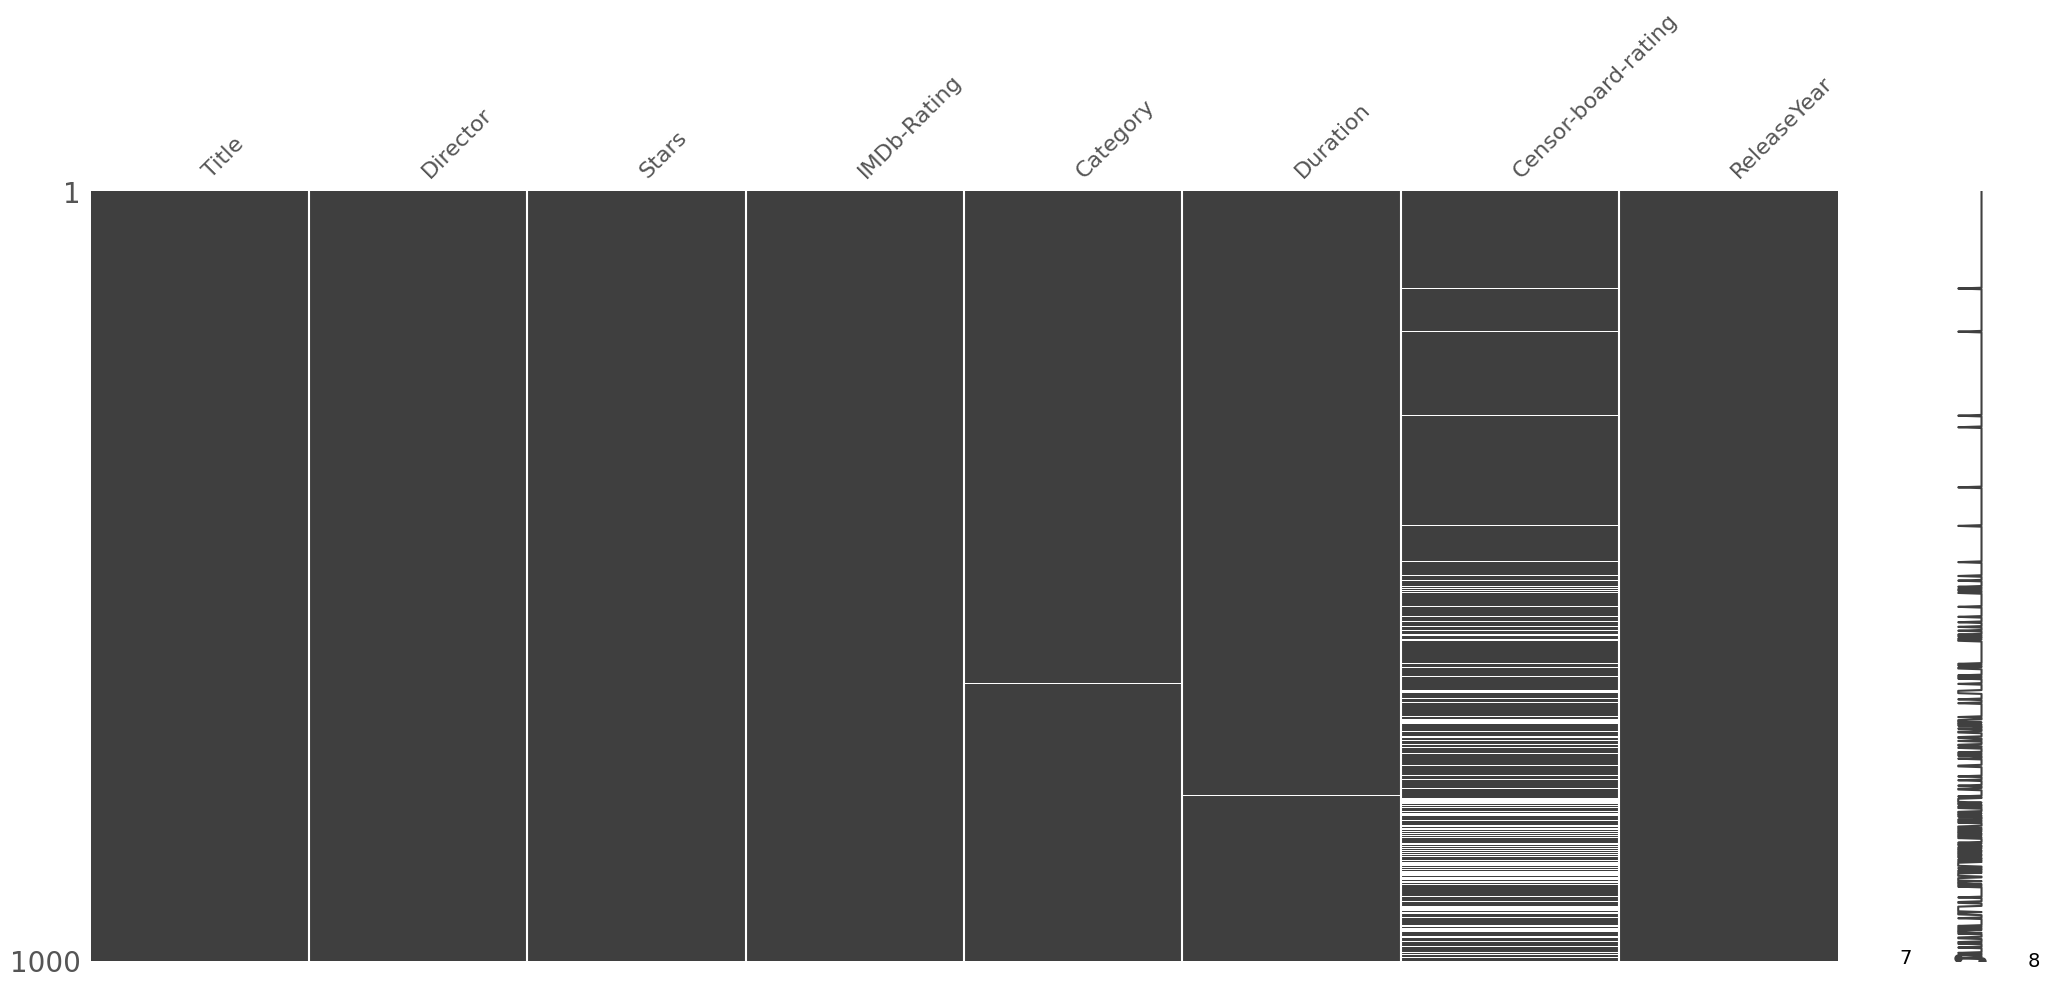

In [ ]:
msno.matrix(df)

In [ ]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

Category's null rate : 0.1%
Duration's null rate : 0.1%
Censor-board-rating's null rate : 15.4%


In [ ]:
df.describe(include='all').head(4)

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear
count,1000,1000,1000,1000.0,999,999,846,1000.0
unique,998,572,998,NaN,202,143,22,NaN
top,Drishyam,StevenSpielberg,"Prabhas, RanaDaggubati, AnushkaShetty, Tamanna...",NaN,Drama,130min,U,NaN
freq,2,13,2,NaN,83,24,270,NaN


# 📊 Exploratory Data Analysis

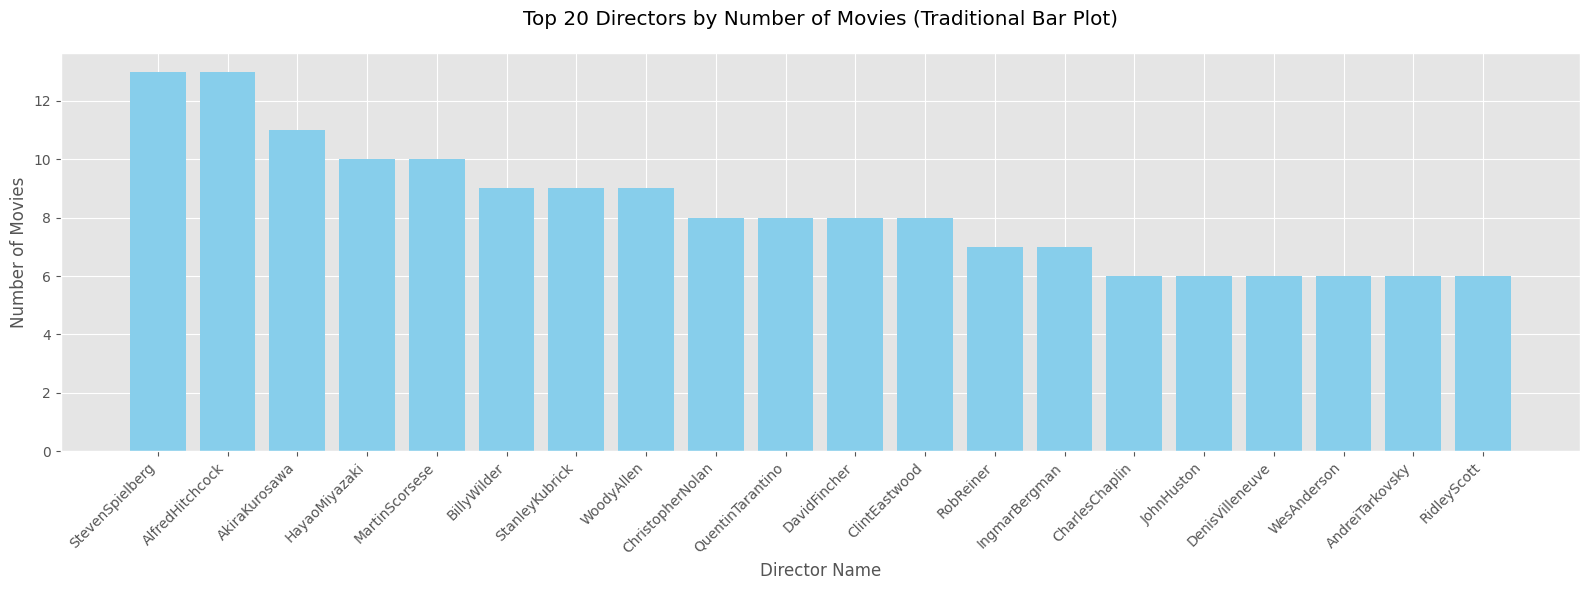

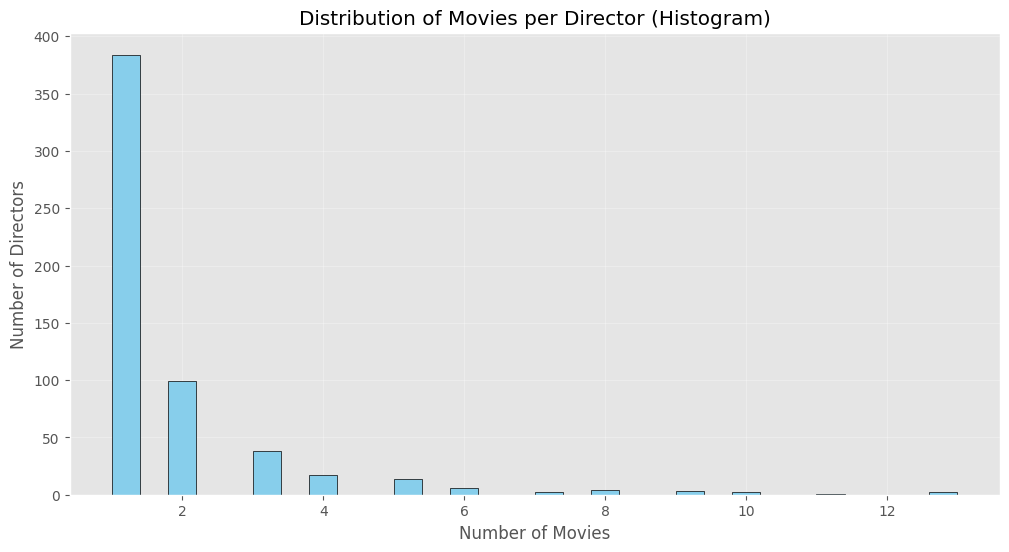

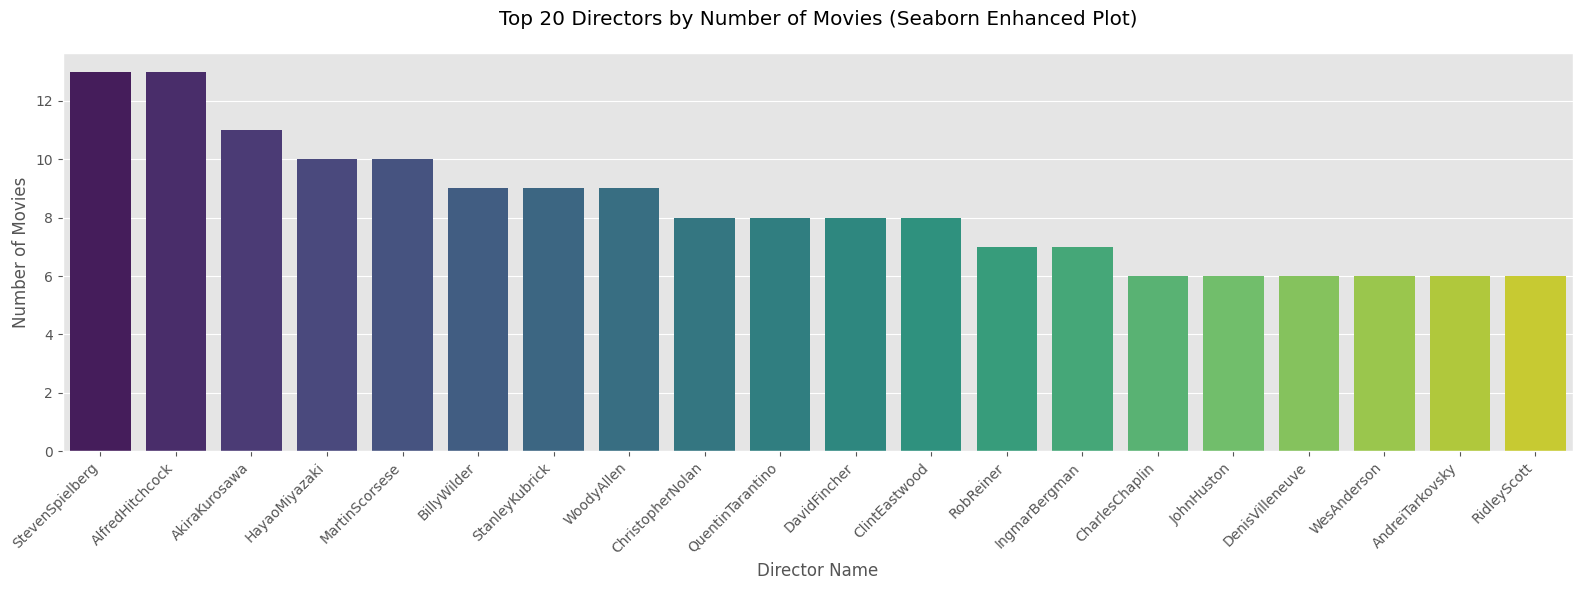

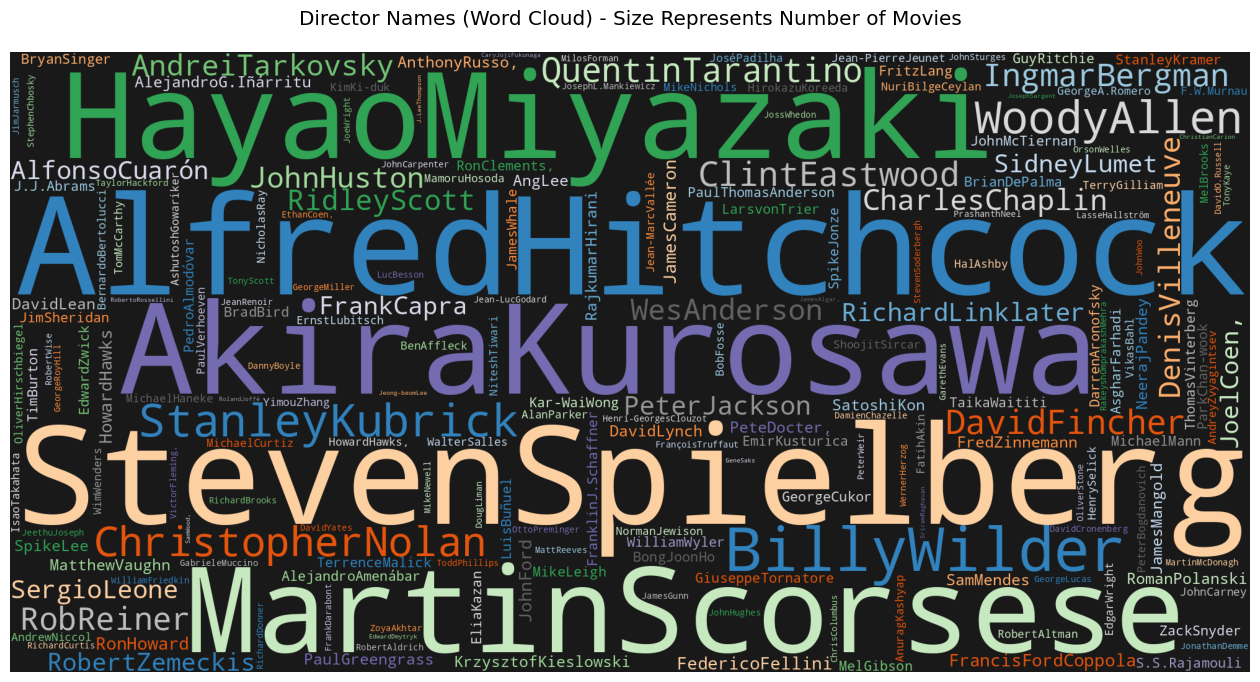


Numerical Summary of Director Frequencies:

Top 10 Directors by Number of Movies:
StevenSpielberg: 13 movies
AlfredHitchcock: 13 movies
AkiraKurosawa: 11 movies
HayaoMiyazaki: 10 movies
MartinScorsese: 10 movies
BillyWilder: 9 movies
StanleyKubrick: 9 movies
WoodyAllen: 9 movies
ChristopherNolan: 8 movies
QuentinTarantino: 8 movies

Director Statistics:
Total number of unique directors: 572
Average movies per director: 1.75
Median movies per director: 1.00
Maximum movies by a single director: 13
Directors with only one movie: 384


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Get director frequencies
director_freq = df['Director'].value_counts()

# 1. Traditional Bar Plot
plt.figure(figsize=(16, 6))
plt.bar(range(20), director_freq[:20], color='skyblue')
plt.xticks(range(20), director_freq[:20].index, rotation=45, ha='right')
plt.title('Top 20 Directors by Number of Movies (Traditional Bar Plot)', pad=20)
plt.xlabel('Director Name')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

# 2. Statistical Histogram of Movie Counts
plt.figure(figsize=(12, 6))
plt.hist(df['Director'].value_counts().values, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Movies per Director (Histogram)')
plt.xlabel('Number of Movies')
plt.ylabel('Number of Directors')
plt.grid(True, alpha=0.3)
plt.show()

# 3. Enhanced Bar Plot with Seaborn
plt.figure(figsize=(16, 6))
sns.barplot(x=director_freq[:20].index, y=director_freq[:20].values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Directors by Number of Movies (Seaborn Enhanced Plot)', pad=20)
plt.xlabel('Director Name')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

# 4. Word Cloud Visualization
plt.figure(figsize=(16,10))
data = df['Director'].value_counts().to_dict()
wc = WordCloud(
    width=2000,
    height=1000,
    random_state=1,
    background_color='#191919',
    colormap='tab20c',
    prefer_horizontal=0.7  # Allow more vertical words
).generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Director Names (Word Cloud) - Size Represents Number of Movies', pad=20)
plt.axis('off')
plt.show()

# 5. Print numerical summary
print("\nNumerical Summary of Director Frequencies:")
print("\nTop 10 Directors by Number of Movies:")
for director, count in director_freq[:10].items():
    print(f"{director}: {count} movies")

print("\nDirector Statistics:")
print(f"Total number of unique directors: {len(director_freq)}")
print(f"Average movies per director: {director_freq.mean():.2f}")
print(f"Median movies per director: {director_freq.median():.2f}")
print(f"Maximum movies by a single director: {director_freq.max()}")
print(f"Directors with only one movie: {sum(director_freq == 1)}")

# 🎬 Top Director with the most high score movies

In [ ]:
topDirector = df['Director']
topDirector['count'] = df['Director'].value_counts().head(10)
topDirector = pd.DataFrame(data=topDirector)
topDirector.columns

Index(['Director'], dtype='object')

In [ ]:
fig = px.bar(topDirector, x=topDirector.Director, y=topDirector.index,color=topDirector.index,
            title='Top Director with the most high score movies', text_auto='.2s',width=1000, height=700,
       color_discrete_map={
                "StevenSpielberg": "crimson",
                "AlfredHitchcock": "crimson",
                "AkiraKurosawa": "lightslategray",
                "HayaoMiyazaki": "lightslategray",
                "MartinScorsese": "lightslategray",
                "BillyWilder": "lightslategray",
                "StanleyKubrick": "lightslategray",
                "WoodyAllen": "lightslategray",
                "ChristopherNolan": "lightslategray",
                "QuentinTarantino": "lightslategray",
       })
fig.update_layout(showlegend=False)

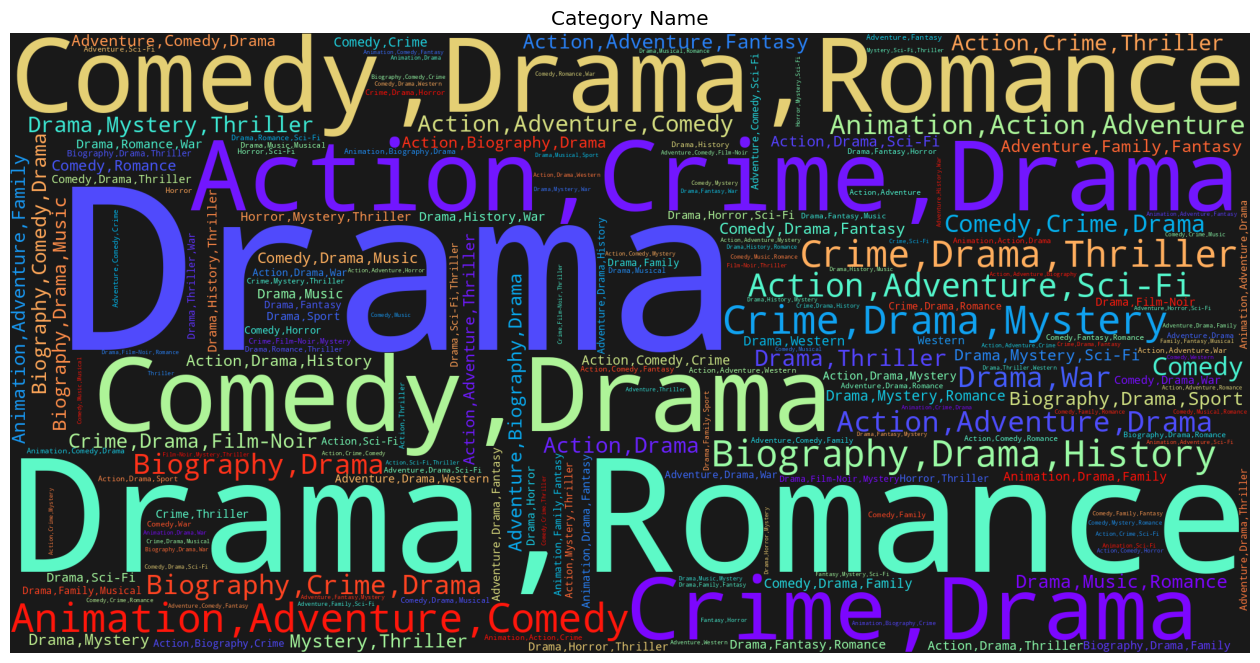

In [ ]:
plt.figure(figsize=(16,10))
data = df['Category'].value_counts().to_dict()
wc = WordCloud(width= 2000, height = 1000, random_state=1,background_color='#191919', colormap='rainbow').generate_from_frequencies(data)
plt.imshow(wc)
plt.title('Category Name')
plt.axis('off')
plt.show()

# 🎞️ Movie Category

In [ ]:
categorycount = df.groupby('Category').count().sort_values(by = 'Title', ascending=False).head(10)
categorycount.rename(columns={'index':'Value'}, inplace=True)

In [ ]:
!pip install squarify

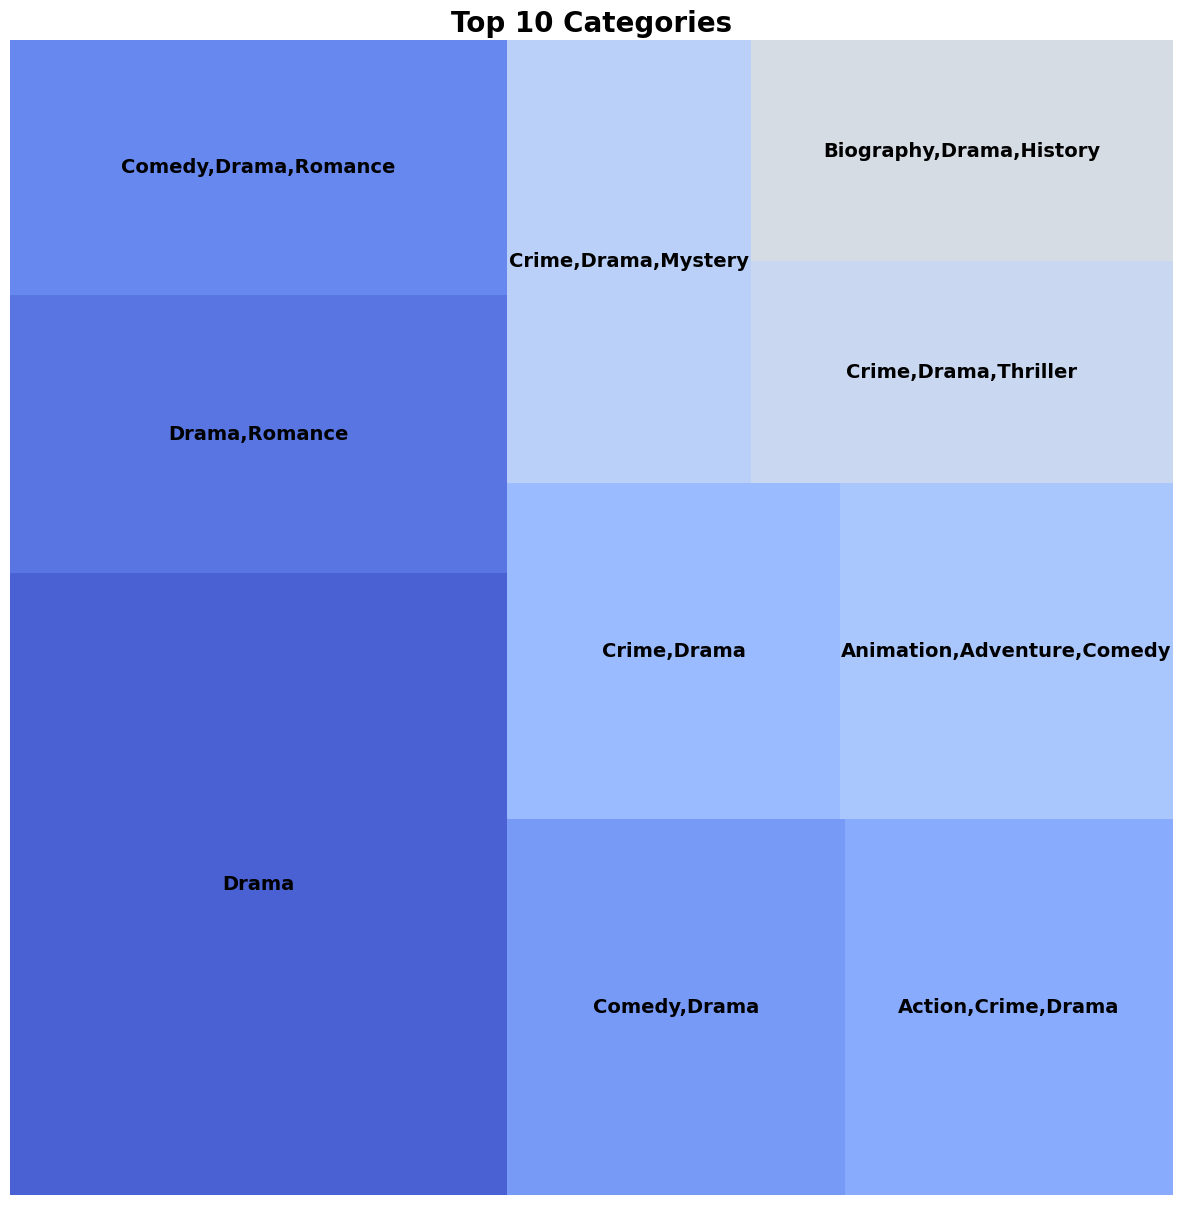

In [ ]:
from matplotlib import gridspec

import squarify

y = categorycount
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.Title, label = y.index, color=sns.color_palette("coolwarm", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 10 Categories', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

# ⭐ IMDb Rating

In [ ]:
topscore = pd.Series(collections.Counter(df['IMDb-Rating']), name="IMDb-Rating").to_frame(name = 'Count').sort_values(by = 'Count',ascending=False).head(5)

In [ ]:
from plotly.subplots import make_subplots
colors = ['lightslategray',] * 5
colors[0] = '#DBA506'
fig1 = make_subplots(rows=1, cols=2)
trace0 = go.Histogram(x=df['IMDb-Rating'])
trace1 = go.Bar(x=topscore.index, y=topscore.Count,marker_color=colors)
fig1.append_trace(trace0, 1, 1)
fig1.append_trace(trace1, 1, 2)
fig1.update_layout(height=600, width=920, title_text="Distribution of IMDb Rating")
fig1.show()

In [ ]:
fig = px.density_heatmap(df, x="ReleaseYear", y="IMDb-Rating", title = 'Density of IMDb Rating Vs. Release Year')
fig.show()

# 🔞 Frequency of censor board rating

Text(0.5, 1.0, 'Frequency of censor board rating')

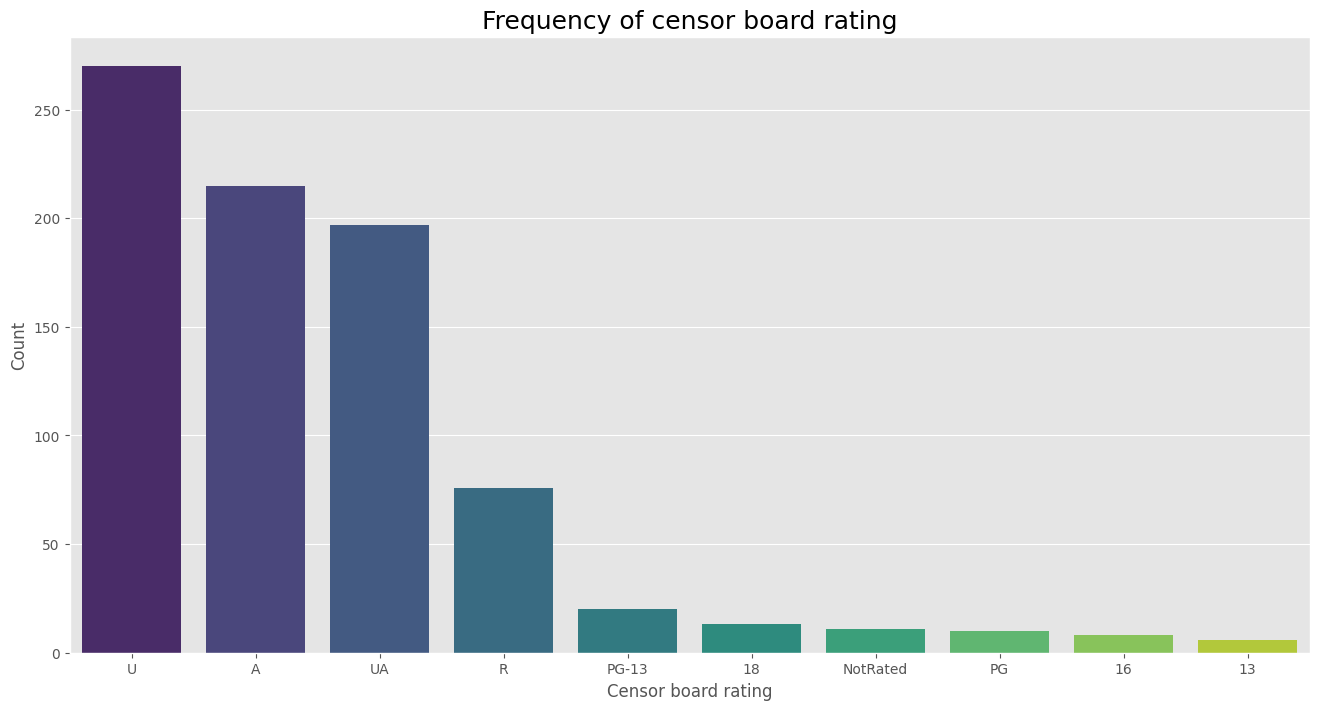

In [ ]:
plt.figure(figsize=(16,8))
censor = sns.countplot(x='Censor-board-rating',data=df, order=df['Censor-board-rating'].value_counts().index[0:10],palette='viridis')
plt.ylabel('Count',fontsize=12)
plt.xlabel('Censor board rating',fontsize=12)
plt.title('Frequency of censor board rating',fontsize=18)

In [ ]:
censor = df['Censor-board-rating'].value_counts()[0:5].to_frame(name = 'Count')

In [ ]:
fig = px.pie(censor, names=censor.index,values=censor.Count,title='Population of Censor board rating',color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

# 📈 Frequency of High Score Movies in Each Year

Text(0.5, 58.7222222222222, 'Date')

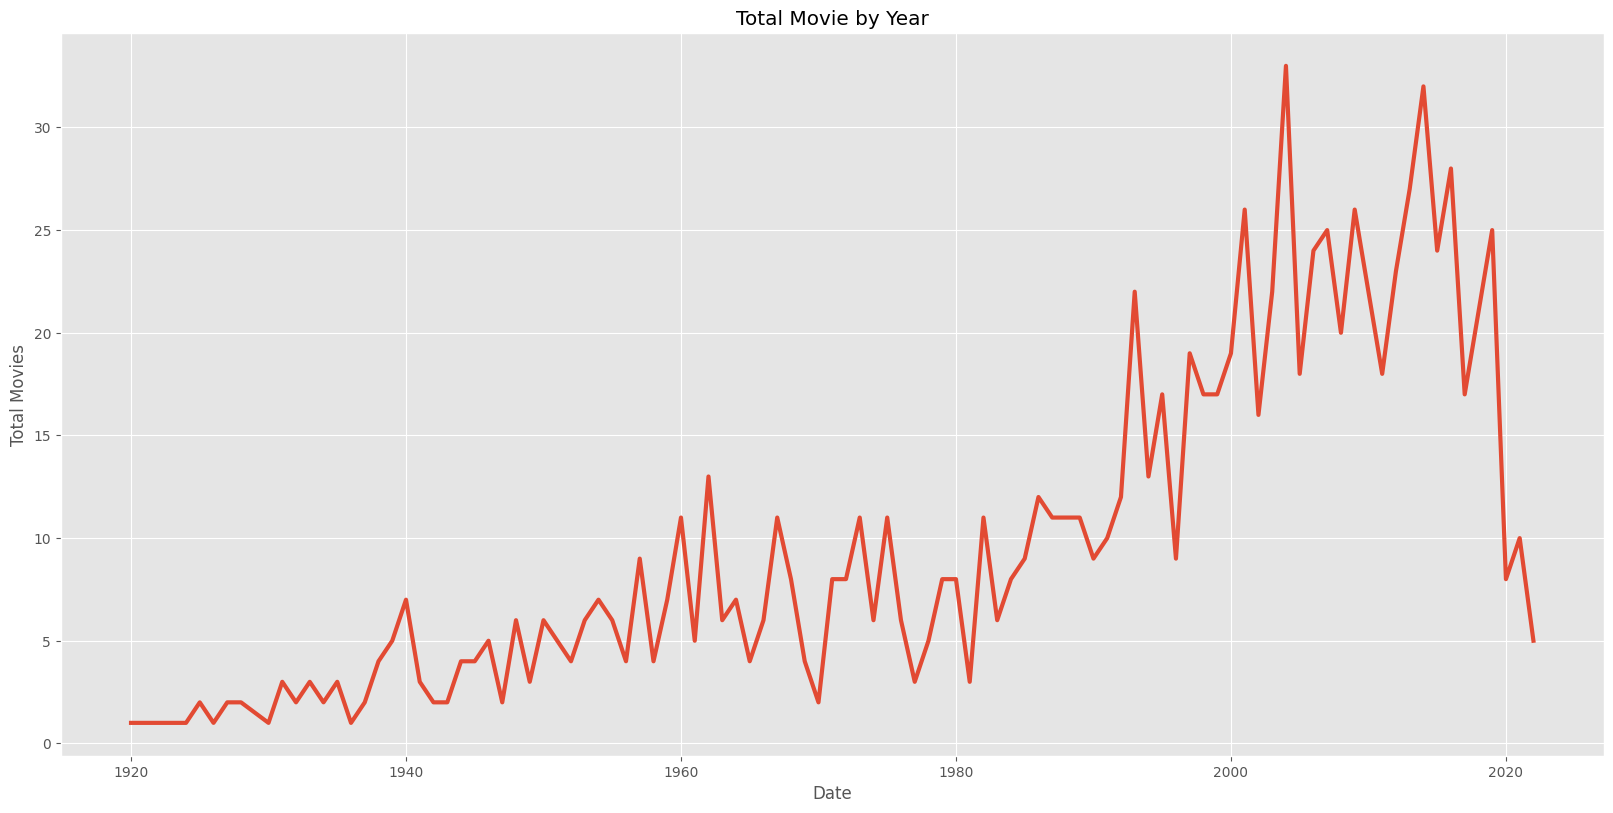

In [ ]:
plt.figure(figsize=(16,8))
df.groupby('ReleaseYear').count()['Title'].plot(linewidth = 3)
plt.tight_layout()
plt.title('Total Movie by Year')
plt.ylabel("Total Movies")
plt.xlabel("Date")

In [ ]:
topyear = pd.Series(collections.Counter(df['ReleaseYear']), name="ReleaseYear").to_frame(name = 'Count').sort_values(by = 'Count',ascending=False).head(10)

Text(0.5, 1.0, 'Frequency of Movies in each year')

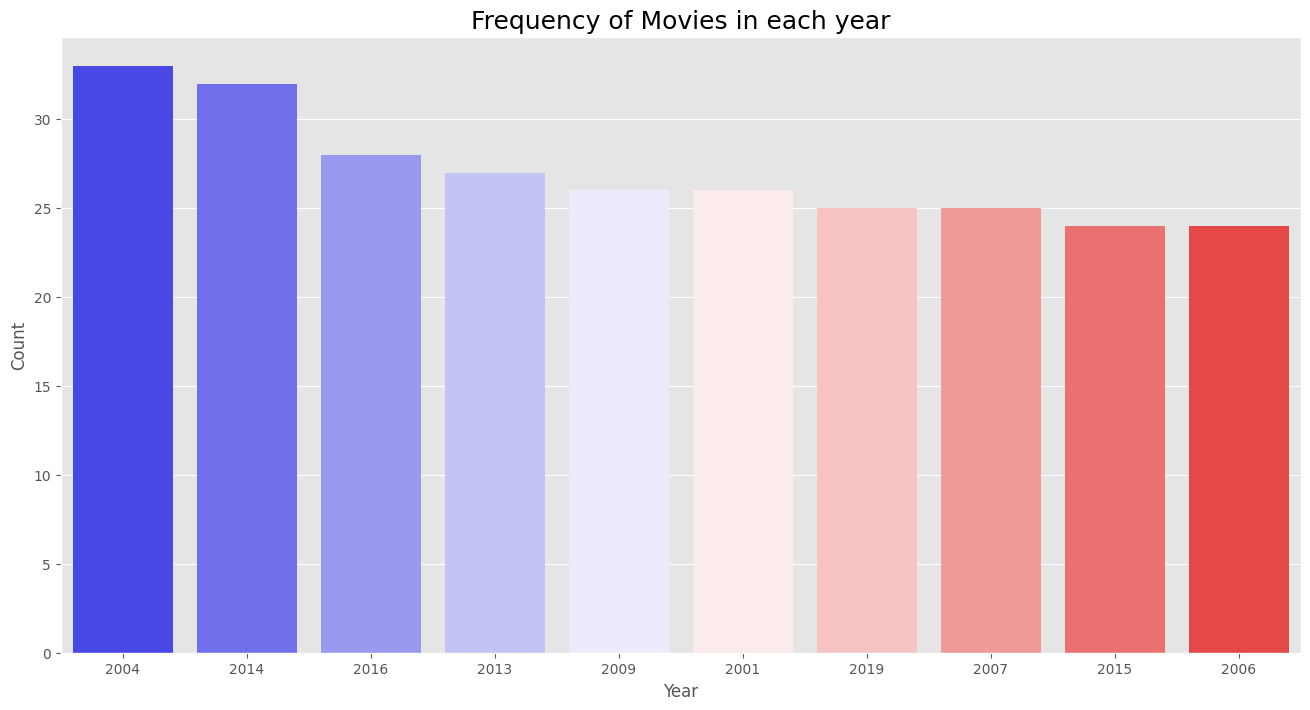

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x=topyear.index, y=topyear.Count, data=topyear,order = topyear['Count'].index[0:10],palette="bwr")
plt.ylabel('Count',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.title('Frequency of Movies in each year',fontsize=18)

In [ ]:
fig = px.pie(topyear, names=topyear.index,values=topyear.Count,title='Population of Movies in each year',color_discrete_sequence=px.colors.sequential.Blues)
fig.show()

# 🎥 Recent movies with highest score

In [ ]:
recentmovie = df[df['ReleaseYear'] == 2022]

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year','Director', 'Category', 'Rating'],fill_color='paleturquoise',height=30,align='left',font=dict(color='black', size=13)),
                              cells = dict(values=[recentmovie['Title'], recentmovie['ReleaseYear'],recentmovie['Director'], recentmovie['Category'], recentmovie['IMDb-Rating']],fill_color='lavender',height=30,align='left'))])
fig.update_layout(title_text="Recent movies with highest rating")
fig.show()

# 🎬 Top 20 Movies on IMDb

In [ ]:
top20movies = df.sort_values(by=['IMDb-Rating'], ascending=False).head(20)

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year','Director', 'Category', 'Rating'],fill_color='Khaki',height=30,align='left',font=dict(color='black', size=13)),
                              cells = dict(values=[top20movies['Title'], top20movies['ReleaseYear'],top20movies['Director'], top20movies['Category'], top20movies['IMDb-Rating']],fill_color='lavender',height=30,align='left'))])
fig.update_layout(height=940, width=850, title_text="Top Movies in IMDb all the time")
fig.show()

Text(0.5, 0, 'Rating')

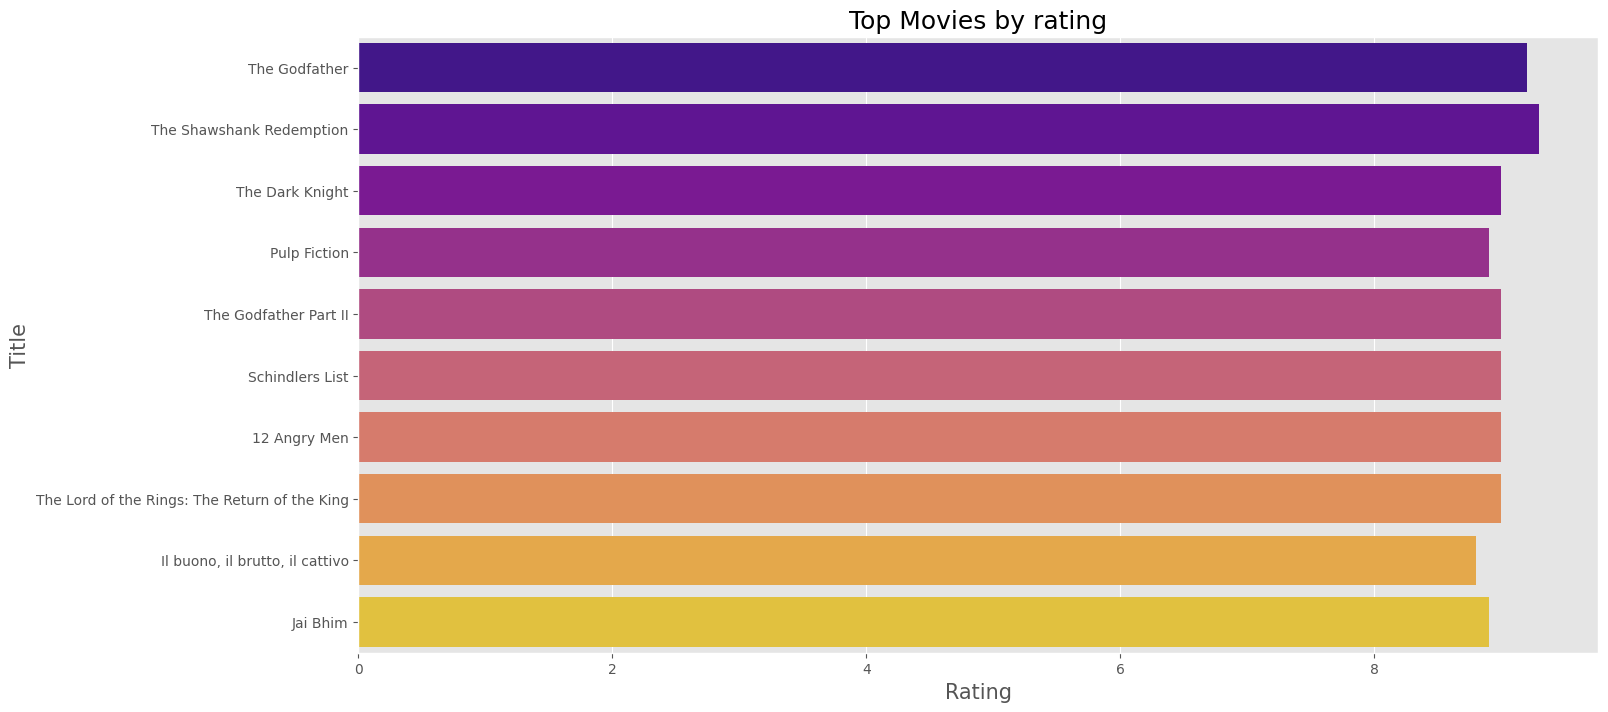

In [ ]:
plt.figure(figsize=(16,8))
sns.barplot(x='IMDb-Rating',y=top20movies.Title[0:10],data=top20movies,palette='plasma')
plt.title('Top Movies by rating',fontsize=18, color = 'black')
plt.ylabel('Title',fontsize=15)
plt.xlabel('Rating',fontsize=15)

# 🥇 1st Movie on IMDb based on Score

<img src = 'https://www.slantmagazine.com/wp-content/uploads/2004/10/shawshankredemption-1000x600.jpg' style = 'border-radius:10%; width:500px; height:300px;'/>

In [ ]:
table_data = [['The Shawshank Redemption', '1st Rank'],
              ['Release Year', 1994],
              ['Director', 'Frank Darabont'],
              ['Stars', 'Tim Robbins, Morgan Freeman, Bob Gunton'],
              ['Category', 'Darama'],
              ['Rating', 9.3],
              ['Censor board rating', 'A'],
              ['Duration', '142 min']]
fig = ff.create_table(table_data, height_constant=60)
fig.show()

# 🥈 2nd Movie on IMDb based on Score

<img src = 'https://media.tacdn.com/media/attractions-splice-spp-674x446/06/73/23/1c.jpg' style = 'border-radius:10%; width:500px; height:300px;'/>

In [ ]:
table_data = [['The Godfather', '2nd Rank'],
              ['Release Year', 1972],
              ['Director', 'Francis Ford Coppola'],
              ['Stars', 'Marlon Brando, Al Pacino, James Caan'],
              ['Category', 'Darama, Crime'],
              ['Rating', 9.2],
              ['Censor board rating', 'A'],
              ['Duration', '176 min']]
fig = ff.create_table(table_data, height_constant=60)
fig.show()

# 🥉 3rd Movie on IMDb based on Score

<img src = 'https://irs.www.warnerbros.com/hero-banner-v2-tablet-jpeg/movies/media/browser/the_dark_knight_banner.jpg' style = 'border-radius:10%; width:500px; height:300px;'/>

In [ ]:
table_data = [['The Dark Knight', '3rd Rank'],
              ['Release Year', 2008],
              ['Director', 'Christopher Nolan'],
              ['Stars', 'Christian Bale, Heath Ledger, Aaron Eckhart'],
              ['Category', 'Action, Crime, Drama'],
              ['Rating', 9.0],
              ['Censor board rating', 'UA'],
              ['Duration', '152 min']]
fig = ff.create_table(table_data, height_constant=60)
fig.show()

# What is Recommendation System

<img src = 'https://help.uberflip.com/hc/article_attachments/360023353871/animation-01-bambora.gif' style = 'border-radius:10%; width:700px; height: 500px'/>

The recommendation systems are defined as a software tools to give suggestions for items to the users in which they might be interested. The suggestions might be related to decision-making processes which can be within these – what movie / TV series to watch, what playlist to listen, what items to buy, what news to read, or what videos to watch and many more in this list. The main objective of the recommendation systems is to provide recommendations to users on their online activities for better choices from many options.

# Content Based Filtering

Here, users rate items and from that a model of user preferences against the item attributes is built. An example could be in the domain of movies. Suppose someone likes science fiction, fantasy and action movies, and doesn’t like romantic movies. Overtime the algorithm can accumulate this and Figure out that the user has positive scores on genres like science fiction, fantasy and action, and lower scores for romance. The algorithm might also find out that there were some actors that user likes or dislikes. For example, the user can be a fan of movies with the actor Bruce Willis, and not a fan of Ben Stiller.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                1000 non-null   object 
 1   Director             1000 non-null   object 
 2   Stars                1000 non-null   object 
 3   IMDb-Rating          1000 non-null   float64
 4   Category             999 non-null    object 
 5   Duration             999 non-null    object 
 6   Censor-board-rating  846 non-null    object 
 7   ReleaseYear          1000 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [ ]:
features = ['Category', 'Title', 'Stars', 'Director']

In [ ]:
def combine_features(row):
    return row['Title']+' '+row['Category']+' '+row['Director']+' '+row['Stars']

In [ ]:
for feature in features:
    df[feature] = df[feature].fillna('')

In [ ]:
df['combined_features'] = df.apply(combine_features, axis = 1)
df.head()

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear,combined_features
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022,"Top Gun: Maverick Action,Drama JosephKosinski ..."
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022,"Everything Everywhere All at Once Action,Adven..."
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022,"The Batman Action,Crime,Drama MattReeves Rober..."
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993,"Jurassic Park Action,Adventure,Sci-Fi StevenSp..."
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972,"The Godfather Crime,Drama FrancisFordCoppola M..."


In [ ]:
print(df.loc[0, 'combined_features'])

Top Gun: Maverick Action,Drama JosephKosinski TomCruise, JenniferConnelly, MilesTeller, ValKilmer


In [ ]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combined_features'])

In [ ]:
cosine_sim = cosine_similarity(count_matrix)

In [ ]:
df['index'] = df.index
df.head()

,Title,Director,Stars,IMDb-Rating,Category,Duration,Censor-board-rating,ReleaseYear,combined_features,index
0,Top Gun: Maverick,JosephKosinski,"TomCruise, JenniferConnelly, MilesTeller, ValK...",8.6,"Action,Drama",130min,UA,2022,"Top Gun: Maverick Action,Drama JosephKosinski ...",0
1,Everything Everywhere All at Once,"DanKwan,",", MichelleYeoh, StephanieHsu, KeHuyQuan, James...",8.3,"Action,Adventure,Comedy",139min,R,2022,"Everything Everywhere All at Once Action,Adven...",1
2,The Batman,MattReeves,"RobertPattinson, ZoëKravitz, JeffreyWright, Co...",7.9,"Action,Crime,Drama",176min,UA,2022,"The Batman Action,Crime,Drama MattReeves Rober...",2
3,Jurassic Park,StevenSpielberg,"SamNeill, LauraDern, JeffGoldblum, RichardAtte...",8.2,"Action,Adventure,Sci-Fi",127min,UA,1993,"Jurassic Park Action,Adventure,Sci-Fi StevenSp...",3
4,The Godfather,FrancisFordCoppola,"MarlonBrando, AlPacino, JamesCaan, DianeKeaton",9.2,"Crime,Drama",175min,A,1972,"The Godfather Crime,Drama FrancisFordCoppola M...",4


In [ ]:
def get_title_from_index(index):
    return df[df.index == index]["Title"].values[0]
def get_index_from_title(Title):
    return df[df.Title == Title]["index"].values[0]

# 🦇 Batman Movie Recommendations

<img src = 'https://i.gifer.com/1e14.gif' style = 'border-radius:10%; width:600px; height:300px;'/>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_movie_vectors(movie1_title, movie2_title):
    # Get the feature vectors for two movies
    movie1_features = df[df['Title'] == movie1_title]['combined_features'].values[0]
    movie2_features = df[df['Title'] == movie2_title]['combined_features'].values[0]

    # Transform to vector space (using only 2 most common terms for visualization)
    vectors = cv.fit_transform([movie1_features, movie2_features]).toarray()
    feature_names = cv.get_feature_names_out()

    # Select top 2 features with highest combined values
    feature_sums = vectors.sum(axis=0)
    top_2_indices = feature_sums.argsort()[-2:]

    # Create 2D vectors for visualization
    vector1 = vectors[0][top_2_indices]
    vector2 = vectors[1][top_2_indices]

    # Plot vectors
    plt.figure(figsize=(12, 8))
    plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='r', label=movie1_title)
    plt.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='b', label=movie2_title)

    # Calculate cosine similarity
    similarity = np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
    angle = np.arccos(similarity)

    # Plot arc showing angle between vectors
    angle_radius = min(np.linalg.norm(vector1), np.linalg.norm(vector2)) * 0.3
    theta = np.linspace(0, angle, 100)
    x = angle_radius * np.cos(theta)
    y = angle_radius * np.sin(theta)
    plt.plot(x, y, 'g--', label=f'Angle: {np.degrees(angle):.2f}°')

    plt.title(f'Vector Representation of Movies\nCosine Similarity: {similarity:.3f}')
    plt.xlabel(feature_names[top_2_indices[0]])
    plt.ylabel(feature_names[top_2_indices[1]])
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.axis('equal')
    plt.show()

In [ ]:
movie_user_likes = "The Batman"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))

In [ ]:
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]
print(get_title_from_index(20))

Whiplash


In [ ]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to The Batman are:

Batman Begins
The Fugitive
The Dark Knight
The French Connection
Enter the Dragon
Dawn of the Planet of the Apes
The Lord of the Rings: The Two Towers
The Lord of the Rings: The Fellowship of the Ring
The Lord of the Rings: The Return of the King
The Day of the Jackal
The Godfather


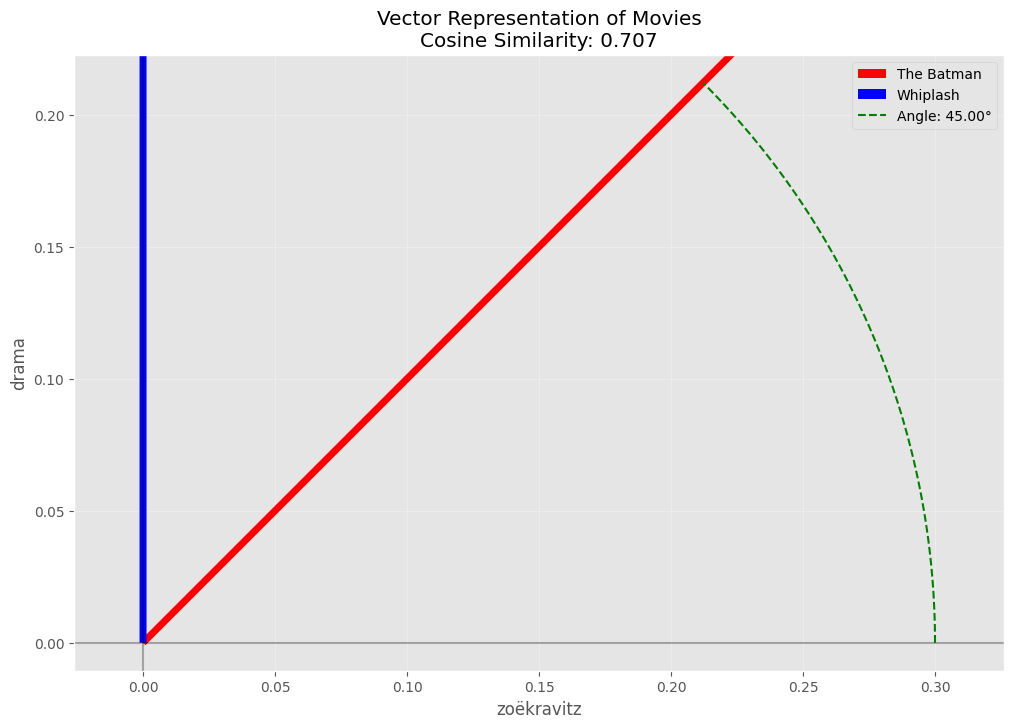

In [ ]:
plot_movie_vectors("The Batman", "Whiplash")

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px
import pandas as pd

def create_movie_vector_space(df, count_matrix, method='pca'):
    """
    Create visualization of movies in vector space
    method: 'pca' or 'tsne'
    """
    # Convert sparse matrix to dense
    dense_matrix = count_matrix.toarray()

    # Dimensionality reduction
    if method == 'pca':
        reducer = PCA(n_components=3)
        reduced_features = reducer.fit_transform(dense_matrix)
        explained_var = reducer.explained_variance_ratio_
        print(f"Explained variance ratio: {explained_var.sum():.2%}")
    else:
        reducer = TSNE(n_components=3, random_state=42)
        reduced_features = reducer.fit_transform(dense_matrix)

    # Create DataFrame with reduced dimensions
    vector_df = pd.DataFrame(
        reduced_features,
        columns=['x', 'y', 'z']
    )

    # Add movie information
    vector_df['Title'] = df['Title']
    vector_df['Category'] = df['Category']
    vector_df['Director'] = df['Director']
    vector_df['Rating'] = df['IMDb-Rating']
    vector_df['Year'] = df['ReleaseYear']

    # Create color mapping for genres
    # Extract primary genre for coloring
    vector_df['PrimaryGenre'] = vector_df['Category'].apply(lambda x: x.split(',')[0])

    # Create interactive 3D scatter plot
    fig = px.scatter_3d(
        vector_df,
        x='x',
        y='y',
        z='z',
        color='PrimaryGenre',
        hover_data=['Title', 'Director', 'Rating', 'Year'],
        title=f'Movies in Vector Space ({method.upper()})',
        labels={'PrimaryGenre': 'Primary Genre'},
        size='Rating',
        size_max=10,
        opacity=0.7
    )

    # Update layout for better visualization
    fig.update_layout(
        scene = dict(
            xaxis_title='Component 1',
            yaxis_title='Component 2',
            zaxis_title='Component 3'
        ),
        width=1000,
        height=800,
        showlegend=True
    )

    # Show plot
    fig.show()

    return vector_df, fig

# Create both PCA and t-SNE visualizations
vector_df_pca, fig_pca = create_movie_vector_space(df, count_matrix, method='pca')
vector_df_tsne, fig_tsne = create_movie_vector_space(df, count_matrix, method='tsne')

# Function to find nearest neighbors in vector space
def find_nearest_neighbors(title, vector_df, n=5):
    """Find n nearest neighbors for a given movie in the vector space"""
    movie_vector = vector_df[vector_df['Title'] == title][['x', 'y', 'z']].values[0]

    # Calculate distances to all other movies
    distances = []
    for idx, row in vector_df.iterrows():
        if row['Title'] != title:
            point = row[['x', 'y', 'z']].values
            distance = np.linalg.norm(movie_vector - point)
            distances.append((row['Title'], distance))

    # Sort by distance and return top n
    return sorted(distances, key=lambda x: x[1])[:n]

# Function to analyze genre clusters
def analyze_genre_clusters(vector_df):
    """Analyze how well genres cluster together"""
    from sklearn.metrics import silhouette_score
    from sklearn.preprocessing import LabelEncoder

    # Encode genres
    le = LabelEncoder()
    genre_labels = le.fit_transform(vector_df['PrimaryGenre'])

    # Calculate silhouette score
    score = silhouette_score(vector_df[['x', 'y', 'z']], genre_labels)
    print(f"Genre clustering silhouette score: {score:.3f}")

    # Calculate genre centroids
    genre_centroids = vector_df.groupby('PrimaryGenre')[['x', 'y', 'z']].mean()
    return genre_centroids

# Example usage
print("\nExample nearest neighbors for 'The Dark Knight':")
neighbors = find_nearest_neighbors('The Dark Knight', vector_df_pca)
for movie, distance in neighbors:
    print(f"{movie}: {distance:.3f}")

print("\nGenre cluster analysis:")
genre_centroids = analyze_genre_clusters(vector_df_pca)
print("\nGenre centroids:")
print(genre_centroids)

Explained variance ratio: 9.31%



Example nearest neighbors for 'The Dark Knight':
The Batman: 0.032
The Fugitive: 0.033
Enter the Dragon: 0.036
The French Connection: 0.039
The 39 Steps: 0.262

Genre cluster analysis:
Genre clustering silhouette score: -0.046

Genre centroids:
                     x         y         z
PrimaryGenre                              
             -0.085259 -0.402501 -0.100276
Action       -0.513365 -0.056961 -0.572685
Adventure    -0.608901 -0.006968  0.181767
Animation    -0.665852 -0.635129  0.139063
Biography     0.376165  0.379514  0.119143
Comedy        0.102564 -0.313949  0.675746
Crime         0.453465  0.279566 -0.449339
Drama         0.348724  0.175237  0.084711
Family       -0.695611  0.333687  0.302375
Fantasy      -0.269532 -0.383499 -0.237187
Film-Noir    -0.354093  0.271010 -0.285077
Horror       -0.411944  0.115700 -0.235289
Mystery      -0.082678 -0.203636 -0.443534
Thriller     -0.063460 -0.343660 -0.331918
Western      -0.342173  0.010069  0.048261


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

def create_movie_comparison_visualization(df, count_matrix, movie1="Life of Pi", movie2="Life of Brian"):
    """
    Create visualization comparing two specific movies in vector space with visible points
    """
    # Convert sparse matrix to dense
    dense_matrix = count_matrix.toarray()

    # Perform PCA
    reducer = PCA(n_components=3)
    reduced_features = reducer.fit_transform(dense_matrix)

    # Create DataFrame with reduced dimensions
    vector_df = pd.DataFrame(
        reduced_features,
        columns=['x', 'y', 'z']
    )

    # Add movie information
    vector_df['Title'] = df['Title']
    vector_df['Category'] = df['Category']
    vector_df['Director'] = df['Director']
    vector_df['Rating'] = df['IMDb-Rating']
    vector_df['Year'] = df['ReleaseYear']
    vector_df['PrimaryGenre'] = vector_df['Category'].apply(lambda x: x.split(',')[0])

    # Get vectors for our two movies
    movie1_vector = vector_df[vector_df['Title'] == movie1][['x', 'y', 'z']].values[0]
    movie2_vector = vector_df[vector_df['Title'] == movie2][['x', 'y', 'z']].values[0]

    # Calculate cosine similarity in reduced space
    cos_sim = np.dot(movie1_vector, movie2_vector) / (np.linalg.norm(movie1_vector) * np.linalg.norm(movie2_vector))
    angle = np.arccos(np.clip(cos_sim, -1.0, 1.0))
    angle_degrees = np.degrees(angle)

    # Create figure with scatter points first
    fig = px.scatter_3d(
        vector_df,
        x='x',
        y='y',
        z='z',
        color='PrimaryGenre',
        hover_data=['Title', 'Director', 'Rating', 'Year'],
        opacity=0.6,
        title=f'Movie Vector Comparison<br>Cosine Similarity: {cos_sim:.3f}, Angle: {angle_degrees:.1f}°'
    )

    # Update scatter point size
    fig.update_traces(marker=dict(size=5))

    # Add vectors for the two movies
    # Movie 1 vector
    fig.add_trace(go.Scatter3d(
        x=[0, movie1_vector[0]],
        y=[0, movie1_vector[1]],
        z=[0, movie1_vector[2]],
        mode='lines',
        line=dict(color='red', width=5),
        name=movie1
    ))

    # Movie 2 vector
    fig.add_trace(go.Scatter3d(
        x=[0, movie2_vector[0]],
        y=[0, movie2_vector[1]],
        z=[0, movie2_vector[2]],
        mode='lines',
        line=dict(color='blue', width=5),
        name=movie2
    ))

    # Add highlighted points for the two movies
    fig.add_trace(go.Scatter3d(
        x=[movie1_vector[0]],
        y=[movie1_vector[1]],
        z=[movie1_vector[2]],
        mode='markers',
        marker=dict(size=10, color='red', symbol='diamond'),
        name=f"{movie1} point"
    ))

    fig.add_trace(go.Scatter3d(
        x=[movie2_vector[0]],
        y=[movie2_vector[1]],
        z=[movie2_vector[2]],
        mode='markers',
        marker=dict(size=10, color='blue', symbol='diamond'),
        name=f"{movie2} point"
    ))

    # Add arc showing angle between vectors
    t = np.linspace(0, angle, 100)
    radius = min(np.linalg.norm(movie1_vector), np.linalg.norm(movie2_vector)) * 0.2

    # Create arc points
    x_arc = radius * np.cos(t)
    y_arc = radius * np.sin(t)
    z_arc = np.zeros_like(t)

    # Rotate arc to align with vectors
    v1_norm = movie1_vector / np.linalg.norm(movie1_vector)
    v2_norm = movie2_vector / np.linalg.norm(movie2_vector)
    cross_product = np.cross(v1_norm, v2_norm)
    if np.all(cross_product == 0):
        cross_product = np.array([1, 0, 0]) if np.all(v1_norm == [0, 1, 0]) else np.cross(v1_norm, [0, 1, 0])
    cross_product = cross_product / np.linalg.norm(cross_product)

    rotation_matrix = np.column_stack([v1_norm, cross_product, np.cross(v1_norm, cross_product)])
    arc_points = np.dot(np.column_stack([x_arc, y_arc, z_arc]), rotation_matrix)

    fig.add_trace(go.Scatter3d(
        x=arc_points[:, 0],
        y=arc_points[:, 1],
        z=arc_points[:, 2],
        mode='lines',
        line=dict(color='green', width=3),
        name=f'Angle: {angle_degrees:.1f}°'
    ))

    # Update layout
    fig.update_layout(
        scene=dict(
            xaxis_title='Component 1',
            yaxis_title='Component 2',
            zaxis_title='Component 3'
        ),
        width=1200,
        height=800,
        showlegend=True
    )

    # Add movie details annotation
    movie1_details = df[df['Title'] == movie1].iloc[0]
    movie2_details = df[df['Title'] == movie2].iloc[0]

    annotation_text = (
        f"{movie1}:<br>"
        f"Genre: {movie1_details['Category']}<br>"
        f"Director: {movie1_details['Director']}<br>"
        f"Rating: {movie1_details['IMDb-Rating']}<br><br>"
        f"{movie2}:<br>"
        f"Genre: {movie2_details['Category']}<br>"
        f"Director: {movie2_details['Director']}<br>"
        f"Rating: {movie2_details['IMDb-Rating']}"
    )

    fig.add_annotation(
        x=1.15,
        y=0.1,
        xref="paper",
        yref="paper",
        text=annotation_text,
        showarrow=False,
        font=dict(size=12),
        align="left",
        bgcolor="white",
        bordercolor="black",
        borderwidth=1
    )

    fig.show()

    return vector_df, cos_sim, angle_degrees

# Create visualization
vector_df, cos_sim, angle = create_movie_comparison_visualization(df, count_matrix)

# Print detailed comparison
print(f"\nDetailed Comparison:")
print(f"Cosine Similarity: {cos_sim:.3f}")
print(f"Angle between vectors: {angle:.1f}°")

# Find and print common features
movie1_features = df[df['Title'] == "Life of Pi"]['combined_features'].values[0].split()
movie2_features = df[df['Title'] == "Life of Brian"]['combined_features'].values[0].split()
common_features = set(movie1_features) & set(movie2_features)

print("\nCommon features between movies:")
for feature in common_features:
    print(f"- {feature}")


Detailed Comparison:
Cosine Similarity: 0.570
Angle between vectors: 55.3°

Common features between movies:
- Life
- of


# 📺 Lord of the Rings Movie Recommendations

<img src = 'https://i.pinimg.com/originals/16/e7/48/16e748a3de3ddd38219a8d161295f26c.gif' style = 'border-radius:10%; width:600px; height:300px;'/>

In [ ]:
movie_user_likes = "The Lord of the Rings: The Two Towers"
# movie_user_likes = "K.G.F: Chapter 2"
movie_index = get_index_from_title(movie_user_likes)
similar_movies = list(enumerate(cosine_sim[movie_index]))

In [ ]:
sorted_similar_movies = sorted(similar_movies,key=lambda x:x[1],reverse=True)[1:]

In [ ]:
i=0
print("Top 10 similar movies to "+movie_user_likes+" are:\n")
for element in sorted_similar_movies:
    print(get_title_from_index(element[0]))
    i=i+1
    if i>10:
        break

Top 10 similar movies to The Lord of the Rings: The Two Towers are:

The Lord of the Rings: The Return of the King
The Lord of the Rings: The Fellowship of the Ring
Pirates of the Caribbean: The Curse of the Black Pearl
The Hobbit: The Desolation of Smaug
The Last of the Mohicans
Dawn of the Planet of the Apes
The Treasure of the Sierra Madre
Rise of the Planet of the Apes
The Remains of the Day
The Trial of the Chicago 7
The Day of the Jackal


<img src = 'https://c.tenor.com/-fqduy0w4ygAAAAC/how-about-that-upvote.gif' style = 'border-radius:10%; width:600px; height:300px;'/>

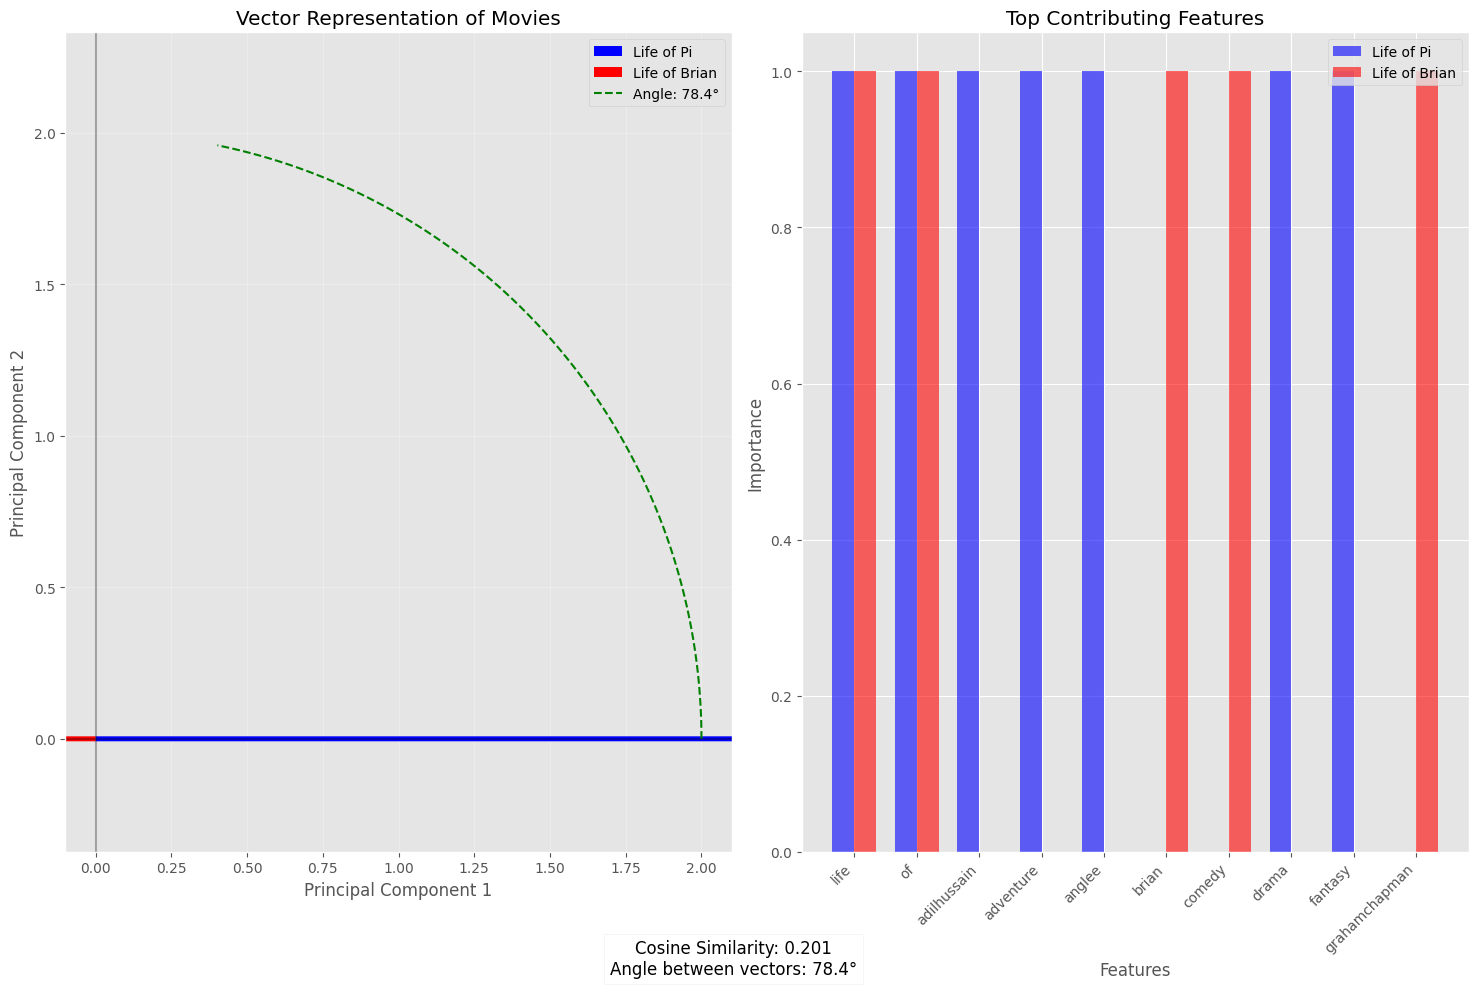


Movie Details:

Life of Pi:
Genre: Adventure,Drama,Fantasy
Director: AngLee
Rating: 7.9

Life of Brian:
Genre: Comedy
Director: TerryJones
Rating: 8.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA

def visualize_movie_comparison(movie1_title, movie2_title, df, cv, count_matrix):
    """
    Create detailed visualization comparing two movies with vectors, angle, and cosine similarity
    """
    # Get indices of the movies
    movie1_idx = df[df['Title'] == movie1_title].index[0]
    movie2_idx = df[df['Title'] == movie2_title].index[0]

    # Get feature vectors for the movies
    vectors = count_matrix.toarray()[[movie1_idx, movie2_idx]]

    # Use PCA to reduce to 2D for visualization
    pca = PCA(n_components=2)
    vectors_2d = pca.fit_transform(vectors)

    # Calculate cosine similarity
    cosine_sim = np.dot(vectors[0], vectors[1]) / (np.linalg.norm(vectors[0]) * np.linalg.norm(vectors[1]))
    angle = np.arccos(np.clip(cosine_sim, -1.0, 1.0))
    angle_degrees = np.degrees(angle)

    # Create visualization
    plt.figure(figsize=(15, 10))

    # Plot main vectors
    vector1 = vectors_2d[0]
    vector2 = vectors_2d[1]

    # Normalize vectors for better visualization
    scale_factor = 5
    vector1_norm = vector1 / np.linalg.norm(vector1) * scale_factor
    vector2_norm = vector2 / np.linalg.norm(vector2) * scale_factor

    # Create a subplot for the vector comparison
    plt.subplot(121)
    plt.quiver(0, 0, vector1_norm[0], vector1_norm[1], angles='xy', scale_units='xy',
              scale=1, color='blue', label=movie1_title)
    plt.quiver(0, 0, vector2_norm[0], vector2_norm[1], angles='xy', scale_units='xy',
              scale=1, color='red', label=movie2_title)

    # Add arc to show angle between vectors
    radius = 2
    theta = np.linspace(0, angle, 100)
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    plt.plot(x, y, 'g--', label=f'Angle: {angle_degrees:.1f}°')

    # Add grid and labels
    plt.grid(True, alpha=0.3)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Vector Representation of Movies')
    plt.legend()
    plt.axis('equal')

    # Create a subplot for feature comparison
    plt.subplot(122)

    # Get top contributing features
    feature_names = cv.get_feature_names_out()
    common_features = []

    # Find common and unique features
    for idx, (v1, v2) in enumerate(zip(vectors[0], vectors[1])):
        if v1 > 0 or v2 > 0:
            common_features.append((feature_names[idx], v1, v2))

    # Sort by combined importance
    common_features.sort(key=lambda x: abs(x[1]) + abs(x[2]), reverse=True)
    top_features = common_features[:10]

    # Plot feature comparison
    x = np.arange(len(top_features))
    width = 0.35

    plt.bar(x - width/2, [f[1] for f in top_features], width, label=movie1_title, color='blue', alpha=0.6)
    plt.bar(x + width/2, [f[2] for f in top_features], width, label=movie2_title, color='red', alpha=0.6)

    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Top Contributing Features')
    plt.xticks(x, [f[0] for f in top_features], rotation=45, ha='right')
    plt.legend()

    # Add similarity score as text
    plt.figtext(0.5, 0.02,
                f'Cosine Similarity: {cosine_sim:.3f}\nAngle between vectors: {angle_degrees:.1f}°',
                ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Print additional information
    print("\nMovie Details:")
    print(f"\n{movie1_title}:")
    print("Genre:", df.loc[movie1_idx, 'Category'])
    print("Director:", df.loc[movie1_idx, 'Director'])
    print("Rating:", df.loc[movie1_idx, 'IMDb-Rating'])

    print(f"\n{movie2_title}:")
    print("Genre:", df.loc[movie2_idx, 'Category'])
    print("Director:", df.loc[movie2_idx, 'Director'])
    print("Rating:", df.loc[movie2_idx, 'IMDb-Rating'])

    return cosine_sim, angle_degrees

# Create CountVectorizer if not already created
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combined_features'])

# Compare the two movies
cosine_sim, angle = visualize_movie_comparison(
    'Life of Pi',
    'Life of Brian',
    df,
    cv,
    count_matrix
)